In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import mnist

In [6]:
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                             ])
trainset = mnist.MNIST(root='MNIST', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = mnist.MNIST(root='MNIST', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ('0','1', '2', '3', '4', '5', '6', '7', '8', '9')

Files already downloaded
Files already downloaded



 2
 6
 0
 1
[torch.LongTensor of size 4]

    2     6     0     1


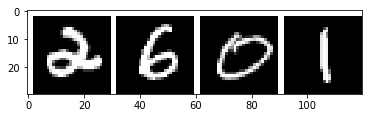

In [7]:
# functions to show an image
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print labels
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #self.conv1 = nn.Conv2d(1, 6, 5)
        #self.pool  = nn.MaxPool2d(2,2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        #self.fc1   = nn.Linear(16*4*4, 120)
        #self.fc2   = nn.Linear(120, 84)
        #self.fc3   = nn.Linear(84, 10)
        #self.conv2drop=nn.Dropout2d()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)inputarray[i][0]=np.asarray(list(timg.getdata())).reshape((28,28))
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        #x = F.relu(self.pool(self.conv1(x)))
        #x = F.relu(self.pool(self.conv2drop(self.conv2(x))))
        #x = x.view(-1, 16*4*4)
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = F.dropout(x, training=self.training)
        #x = self.fc3(x)
        #return F.log_softmax(x)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)        
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [9]:
net = Net()
#net.cuda()  #cuda

#criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(2): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        #inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda()) #cuda

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #loss = criterion(outputs, labels)
        loss =  F.nll_loss(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        # if i % 2000 == 1999: # print every 2000 mini-batches
        if i % 2000 == 0: # print every 2000 mini-batches    
            #print('[%d, %5d] loss: %.3f' % (epoch+1, i, running_loss / 2000))
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(data), len(trainloader.dataset),
                100. * i / len(trainloader), loss.data[0]))
            running_loss = 0.0
print('Finished Training')

Train Epoch: 0 [0/60000 (0%)]	Loss: 1.543246
Train Epoch: 0 [4000/60000 (13%)]	Loss: 0.121964
Train Epoch: 0 [8000/60000 (27%)]	Loss: 0.000517
Train Epoch: 0 [12000/60000 (40%)]	Loss: 0.241892
Train Epoch: 0 [16000/60000 (53%)]	Loss: 0.084773
Train Epoch: 0 [20000/60000 (67%)]	Loss: 0.002913
Train Epoch: 0 [24000/60000 (80%)]	Loss: 0.361334
Train Epoch: 0 [28000/60000 (93%)]	Loss: 0.185321
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.032069
Train Epoch: 1 [4000/60000 (13%)]	Loss: 0.008074
Train Epoch: 1 [8000/60000 (27%)]	Loss: 0.000908
Train Epoch: 1 [12000/60000 (40%)]	Loss: 0.002586
Train Epoch: 1 [16000/60000 (53%)]	Loss: 0.000037
Train Epoch: 1 [20000/60000 (67%)]	Loss: 0.288805
Train Epoch: 1 [24000/60000 (80%)]	Loss: 0.302003
Train Epoch: 1 [28000/60000 (93%)]	Loss: 0.023371
Finished Training


('GroundTruth: ', '    7     2     1     0')

 7
 2
 1
 0
[torch.LongTensor of size 4x1]
 (
-5.4122e-11
-2.9622e-05
-1.5138e-02
-9.0293e-08
[torch.FloatTensor of size 4x1]
, 
 7
 2
 1
 0
[torch.LongTensor of size 4x1]
)
('Predicted: ', '    7     2     1     0')


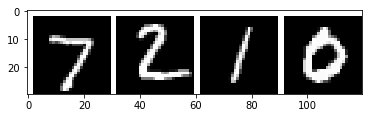

In [24]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

outputs = net(Variable(images))
#outputs = net(Variable(images).cuda())  #cuda

# the outputs are energies for the 10 classes.
# Higher the energy for a class, the more the network
# thinks that the image is of the particular class

# So, let's get the index of the highest energy
_, predicted = torch.max(outputs.data, 1)
p = torch.max(outputs.data, 1)
print predicted,p

print('Predicted: ', ' '.join('%5s'% classes[predicted[j][0]] for j in range(4)))

In [25]:
correct = 0
total = 0
for data in testloader:
    images, labels = data    
    #images, labels = Variable(images.cuda()), Variable(labels.cuda()) #cuda
    #images, labels = Variable(images), Variable(labels) 
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    #correct += (predicted == labels.data).sum()  #cuda
    

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 95 %


In [26]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))classes = ('0','1', '2', '3', '4', '5', '6', '7', '8', '9')
for data in testloader:
    images, labels = data
    #images, labels = Variable(images.cuda()), Variable(labels.cuda()) #cuda 
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    #c = (predicted == labels.data).squeeze()  #cuda
    for i in range(4):
        label = labels[i]
        #label = labels[i].data #cuda
        #label = label.cpu().numpy()[0]  #cuda
        class_correct[label] += c[i]
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 97 %
Accuracy of     1 : 98 %
Accuracy of     2 : 95 %
Accuracy of     3 : 97 %
Accuracy of     4 : 96 %
Accuracy of     5 : 94 %
Accuracy of     6 : 94 %
Accuracy of     7 : 94 %
Accuracy of     8 : 93 %
Accuracy of     9 : 92 %


In [27]:
torch.save(net.state_dict(),'/home/wang/git/cifar10/mnist.weight')